In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('dark_background')

![image](Desktop/June/Github\ for\ LinkedIn/KL Control/Grid.png)

The task is to reach goal state by learning the optimal policy

In [2]:
class State(object):
    
    def __init__(self, x=0, y=0):
        
        self.X=x
        self.Y=y
        
        
        
class GridWorld(object):
    
    def __init__(self):
        
        self.States=[]
        self.N=100     #100 states
        self.Q=np.zeros(100)

        for j in range(10):
            for i in range(10):
                     self.States.append(State(i+1, j+1))
                    
                    
        self.P=np.zeros([100, 100])
        
        
       
        #Corner points

        self.P[0, 10]=0.5
        self.P[0, 1]=0.5
        
        self.P[90, 91]=0.5
        self.P[90, 80]=0.5
        
        self.P[99, 89]=0.5
        self.P[99, 98]=0.5
        
        self.P[9, 8]=0.5
        self.P[9, 19]=0.5
        
        #Boundary points
        
        #lower boundary
        for i in range(1, 9):
            
            self.P[i, i-1]=0.25
            self.P[i, i+1]=0.25
            self.P[i, i+10]=0.5
            
            
        #Left Boundary
        for j in range(1, 9):
            
            self.P[j*10, j*10+10]=0.25
            self.P[j*10, j*10-10]=0.25
            self.P[j*10, j*10+1]=0.5
            
        #Upper Boundary
        for i in range(91, 99):
            
            self.P[i, i+1]=0.25
            self.P[i, i-1]=0.25
            self.P[i, i-10]=0.5
            
        #Right Boundary
        for j in range(1, 9):
            
            self.P[j*10+9, j*10-1]=0.25
            self.P[j*10+9, j*10+19]=0.25
            self.P[j*10+9, j*10+8]=0.5
            
            
        for i in range(1, 9):
            for j in range(1, 9):
                
                c=i+10*j
                self.P[c, c+1]=0.25
                self.P[c, c-1]=0.25
                self.P[c, c+10]=0.25
                self.P[c, c-10]=0.25
                
                
        #Goal State
        self.P[88, :]=np.zeros(100)
        self.P[88, 88]=1
        
        
        self.Q[88]=-5 
        self.V=self.Q
        self.Z=np.exp(-self.V)
        self.U=self.P
        
    def updateU(self):
        
        U=np.zeros([100, 100])
            
        
        for i in range(100):
            
            s=0
            
            for j in range(100):
                
                if self.P[i, j]!=0:
                    
                    a=self.P[i, j]*self.Z[j]
                    s+=a
                    U[i, j]=a
                    
            U[i, :]=U[i, :]/s
        
        self.U=U
                    
    def updateV(self):
        
        V=np.zeros(100)
        
        for i in range(100):
            
            s=self.Q[i]
            
            for j in range(100):
                
                s+=self.U[i, j]*self.V[j]
                
            V[i]=s
            
        self.V=V
        self.Z=np.exp(-V)
        
        
    def Performance(self, n=20, index=11):
        
        T=[]
        
        j=index
        
        Choices=list(range(0, 100))
        for i in range(n):
            
            t=0
            
            while j!=88:
                
                
                new=np.random.choice(Choices, p=self.U[j])
                j=new
                t+=1
                
            T.append(t)
            j=index
            
        return T
                

In [3]:
A=GridWorld()
Ts=[]

for i in range(50):
    
    Ts.append(A.Performance(1000, 11))
    A.updateU()
    A.updateV()
    
    
Means=[]
Vars=[]

for i in range(18):
    
    Means.append(np.mean(Ts[i]))
    Vars.append(np.std(Ts[i]))
    
    

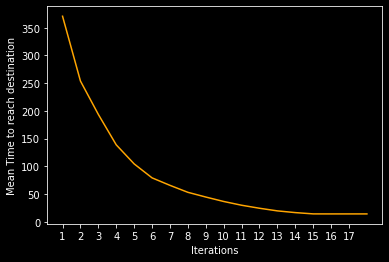

In [4]:
X=np.linspace(1, 18, 18)

plt.plot(X, Means, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Mean Time to reach destination')
plt.xticks(np.arange(1, 18, step=1))  #
plt.grid(False)
plt.savefig('MeanTimeGridWorld', transparent=True)
plt.show()

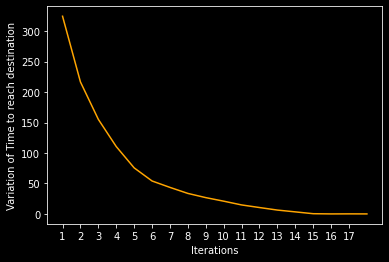

In [5]:
plt.plot(X, Vars, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Variation of Time to reach destination')
plt.grid(False)
plt.xticks(np.arange(1, 18, step=1))  #
plt.savefig('MeanTimeVarGridWorld', transparent=True)
plt.show()